## Linear Regression (2 variable test)

Today I am going to take a look at linear regression, and how to calculate it working against the iris dataset
has been used in the last study group. 

**Note: most of the contents of this notebook were created after following along with 
[this video](https://www.youtube.com/watch?v=Qa2APhWjQPc)**

Relationship between 2 or more variables.  
 - Independent variable and dependent variable
 
Lets start by loading common library pieces. 

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

Now we can load the iris dataset. 

In [2]:
import os
import json
import random

from pprint import pprint

data_dir = os.path.join('..', 'raw_data', 'iris')
dataset_filename = os.path.join(data_dir, 'iris_data.json')

with open(dataset_filename, 'r') as iris_file:
    iris_data = json.load(iris_file)
        
#pprint(iris_data[:1])
#[{'petal_length': 1.4,
#  'petal_width': 0.2,
#  'sepal_length': 5.1,
#  'sepal_width': 3.5,
#  'species': 'Iris-setosa'}]

### Data Analysis

We aren't going to currently do much more analysis, however for this initial linear regression problem we 
are going to solve it with two variables.

- Independent: `petal_length`
- Dependent: `petal_width`

Our goal with these two variables is to learn a function that can estimate the petal_width ($\hat{y}$) given the
petal_length ($x$).  The function ($f$) is a parametric model.  

**Note: a parametric model has a fixed number of parameters: coefficients / weights.** 

$$\hat{y} = f(x)$$

In [3]:
independent_variable = x_name = 'petal_length'
dependent_variable = y_name = 'petal_width'

If we were given a set of values for a single variable, but we wanted to estimate what the next variable
would be, the best thing we could do is to determine what the mean is for that variable... 

$$\bar{y}$$

**So with only one variable and no other information, the best prediction for the next measurement is the 
mean of the sample itself.**   

Lets start by creating a mean from our dataset, we will start by splitting our data into a train, test pair. 

In [4]:
split = 0.20
split_index = int(len(iris_data) * split)

random.seed(42)
random.shuffle(iris_data)

test_data = iris_data[:split_index]
train_data = iris_data[split_index:]

Now let's take our single variable `petal_length` and calculate the mean, that we can use in future
predictions.  

The mean value for a random variable 

>## Proof (Why use mean)?
>
>We are trying to minimize the overall error given a set of points, the minimum is found by taking the difference between each of 
>the points and comparing them to the mean. Let's start by proving that. 
>
>The squared error function is defined as:
>$$f(a) = {\sum_{j=1}^n{(x_j - a)^2}}$$
>
>The Least Squared function is defined as:
>$$\min_{a\in R}(f(a))$$ 
>
>In order to find the minimum of this 2nd order polynomial we need to find the point where the slope is 0, this can be found by 
>finding the location where the derivative is equal to 0. 
>
>$$\frac{\partial f(a)}{\partial a} = \frac{\partial }{\partial a}{\sum_{j=1}^n{(x_j - a)^2}}$$
>
>First lets expand it in order to solve for the derivative of the function.  
>
>$$\frac{\partial f(a)}{\partial a} = \frac{\partial }{\partial a}{\sum_{j=1}^n{(x_j^2 -2a x_j + a^2)}}$$
>
>Because of the [Sum rule in differentiation](https://en.wikipedia.org/wiki/Sum_rule_in_differentiation) we know that the derivative
>of a sum is the same as the sum of a derivative. 
>
>$$\frac{\partial f(a)}{\partial a} = {\sum_{j=1}^n{\frac{\partial }{\partial a} (x_j^2 -2a x_j + a^2)}}$$
>
>Knowing that $x_j$ is a constant, lets solve the derivative. 
>
>$$\frac{\partial f(a)}{\partial a} = {\sum_{j=1}^n{(-2x_j + 2a)}}$$
>
>To find the min, we want to find the point at which the derivative is 0
>
>$$0 = {\sum_{j=1}^n{(-2x_j + 2a)}}$$
>
>Now lets solve the equation
>
>$$0 = \sum_{j=1}^n{(-2x_j)} + \sum_{j=1}^n{2a}$$
>
>subtract the constant sum from both sides
>
>$$-\sum_{j=1}^n{(-2x_j)} = \sum_{j=1}^n{2a}$$
>
>If we pull the 2 out on each side
>
>$$2 \sum_{j=1}^n{x_j} = 2 \sum_{j=1}^n{a}$$
>
>and divide by 2
>
>$$\sum_{j=1}^n{x_j} = \sum_{j=1}^n{a}$$
>
>If we factor out a we have
>
>$$a \sum_{j=1}^n{1} = \sum_{j=1}^n{x_j} $$ 
>
>We know that the sum of $1..n$ can be replaced by multiplying by n, and we can divide out n, giving us
>
>$$a = \frac {\sum_{j=1}^n{x_j}} {n}$$
>
>and by the definition of a mean, for the derivative of $f(a)$ to be zero, $a$ must be $\bar{x}$

In [5]:
def mean(data, variable):
    return sum([d[variable] for d in data]) / len(data)

independent_mean = mean(train_data, independent_variable)
independent_mean

3.6799999999999997

Now that we have our mean, lets see graph it out with the y axis being the `petal_length` and the
x axis being an index into the data is all.

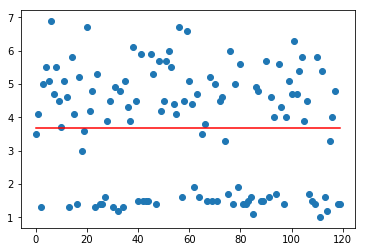

In [6]:
X = list(range(len(train_data)))
Y = [d[independent_variable] for d in train_data]

plt.figure()
plt.scatter(X, Y)
plt.plot(X, [independent_mean for _ in X], color='red')
plt.show()

We can now calculate our residuals (errors) from the mean.  

In [7]:
residuals = [d[independent_variable] - independent_mean for d in train_data]
pprint(residuals[:5])

[-0.17999999999999972,
 0.41999999999999993,
 -2.38,
 1.3200000000000003,
 1.8200000000000003]


Now lets add up the residuals. 

In [8]:
sum(residuals)

3.375077994860476e-14

The one thing to note, is that outside of the calculation error our sum is basically 0.  

Residuals always add up to zero when using the mean (residual is the error from the prediction)

What we want to determine is that sum of the square of the errors, so lets do that now. 

In [9]:
def sum_of_residuals(mean, data, variable):
    return sum([(d[variable] - mean) ** 2 for d in data])

sse = sum_of_residuals(independent_mean, train_data, independent_variable)
sse

376.1519999999997

In linear regression, we are going to minimize the sum of squares of the residuals / error (SSE).  

### Linear Regression

Linear regrsion shares traits with `anova` and `correlation`.  
**Note: Regression is very sensitive to rounding**

Functionally, we have a value of $y$ that is a function of $x$ so 

$$y = f(x)$$

In algebra, we can define a line as:

$$y = mx + b$$

and in the case of linear regression we are going to have an equation here.  

$$y = \beta_o + \beta_1x + \epsilon$$

- $\beta_0$ is the y-intercept population parameter
- $\beta_1$ is the slope population parameter
- $\epsilon$ is the error term, unexplained variation in y.  

Simple expression

$$ E(y) = \beta_0 + \beta_1x$$

$E(y)$ is the mean or expected value of y for a given x... 

#### General Regression Lines

There are 3 types of regression lines.  

- $\beta_1$ is zero, so slope is 0
- $\beta_1$ is positive (slope increasing)
- $\beta_1$ is negative (slope decreasing)

If we actually knew the population parameters $\beta_0$ and $\beta_1$ we could use the equation. 

#### Least Squares Method

The version of linear regression we are going to implement first is the least squares, defined below. 

$$min \sum{(y_i - \hat{y}_i)^2}$$

Lets start with a scatter plot of our data and our two variables. 

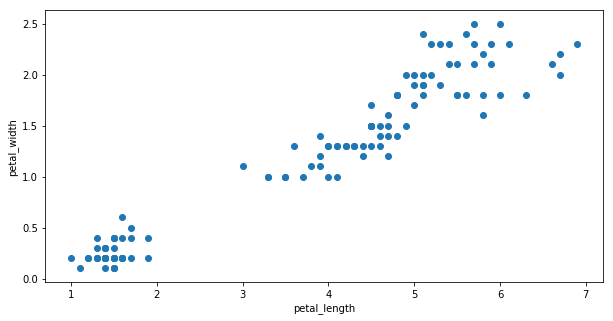

In [10]:
X = [d[x_name] for d in train_data]
Y = [d[y_name] for d in train_data]

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.xlabel(x_name)
plt.ylabel(y_name)

plt.scatter(X, Y)
plt.show()

One thing that we can do is to calculate the coorelation coefficient ($r$) of the two variables. 

We can calculate the $r$ value using the below steps. 

There are a couple of steps to do this.  

1. Get all the x mean and y mean. 
$$\bar{x} , \bar{y}$$

2. Calculate the standard deviation of x and y. 
$$s_x = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n-1}}$$

3. Get the sum of all pairs $n$ of $(x, y)$.
$$\sum_{x} \sum_{y} (x-\bar{x})(y-\bar{y})$$

4. Divide the results of step 3 with the standard deviations of x and y ($s_x, s_y$)
$$\frac{\sum_{x} \sum_{y} (x-\bar{x})(y-\bar{y})}{s_x s_y}$$

5. Divide the results by $n-1$
$$(\frac{\sum_{x} \sum_{y} (x-\bar{x})(y-\bar{y})}{s_x s_y}) * \frac{1}{n-1}$$

In [11]:
import math

def std_deviation(data, variable, mean):
    total = sum([(d[variable] - mean) ** 2 for d in data])
    return math.sqrt(total / (len(data)-1))
    
def error_sum(x_y_pairs, x_mean, y_mean):
    errors = [(d[0] - x_mean) * (d[1] - y_mean) for d in x_y_pairs]
    return sum(errors)

def r_score(x_y_pair):
    x_mean = mean(x_y_pair, 0)
    y_mean = mean(x_y_pair, 1)

    x_std = std_deviation(x_y_pair, 0, x_mean)
    y_std = std_deviation(x_y_pair, 1, y_mean)
    
    error = error_sum(x_y_pair, x_mean, y_mean)
    error_div_std = error / (x_std * y_std)

    r_score = error_div_std / (len(x_y_pair) - 1)
    
    return r_score

r_score([(d[x_name], d[y_name]) for d in train_data])

0.9649387656868356

Since our R value is pretty close to 1, that would lead us to believe that there is a strong coorelation
between the `petal length` and `petal width`. 

Now lets get the centroid, this is the mean of y ($\bar{y}$) and x ($\bar{x}$)

**Note: The line for regression must go through the centroid**

In [12]:
x_mean = mean(train_data, x_name)
y_mean = mean(train_data, y_name)

centroid = (x_mean, y_mean)
centroid

(3.6799999999999997, 1.1716666666666664)

Now that we have the means we can use that to calculate what the $b_0$ and $b_1$ values are. 

$b_1$ (slope) = $\frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}$

$b_0$ (intercept) = $\bar{y}-b_1\bar{x}$

- Petal Width (X) Deviation = ($x_i - \bar{x}$)
- Petal Length (Y) Deviation = ($y_i - \bar{y}$)
- Deviation Products = $(x_i - \bar{x})(y_i - \bar{y})$
- Petal Width (X) Deviation Squared = $(x_i - \bar{x})^2$

In [13]:
x_deviation = [d[x_name] - x_mean for d in train_data]
y_deviation = [d[y_name] - y_mean for d in train_data]
sum_deviation_product = sum([x*y for x, y in zip(x_deviation, y_deviation)])
sum_squared_x_deviation = sum([x ** 2 for x in x_deviation])

b1 = sum_deviation_product / sum_squared_x_deviation
b0 = y_mean - (b1 * x_mean)

print(f'b0: {b0}, b1: {b1}')

b0: -0.36021874135987675, b1: 0.41627320870286505


So this means that our regression line would be.

$$\hat{y}_i = -0.3602187 + 0.416273x_i$$

and if we graph this out we get

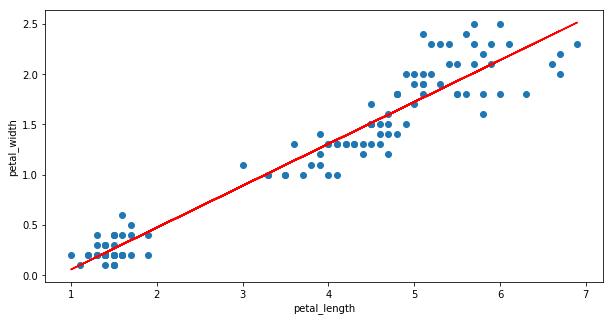

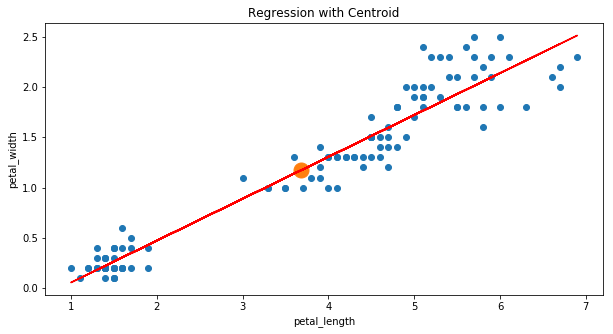

In [14]:
X = [d[x_name] for d in train_data]
Y = [d[y_name] for d in train_data]

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.xlabel(x_name)
plt.ylabel(y_name)
plt.scatter(X, Y)
plt.plot(X, [(b0 + b1*x) for x in X], color='red')
plt.show()

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
plt.title('Regression with Centroid')
plt.scatter(X, Y)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.plot(X, [(b0 + b1*x) for x in X], color='red')
plt.scatter([centroid[0]], [centroid[1]], s=[15**2])
plt.show()

How do we interpret the regression line?  (Basically how the dependent variable changes with changes to the
independent variable). 

Going back to our regression line:
$$\hat{y}_i = -0.3602187 + 0.416273x_i$$

We know that the `slope` is $0.416273$ and the `intercept` is $-0.3602187$, this leads us to believe 2 items. 

1. for every increase in the petal_length, the width of the petal should increase by 0.416273.  
2. When the petal_length is `0` the width of the petal is `-0.3602187`.

Since we know that a petal can never have a negative width, we need to make sure and call out that
the **intercept may or may not make sense in real life**.  

### Model Linear Regression

Now we can take our linear regression information from above and create a model to predict future values, unlike
the knn, we can actually do a fit in our linear regression model, so we will need to split the model up
into a trian/fit portion and a predict portion.  

We will still limit our code implementation to just 2 variables, the independent and the dependent. 

In [15]:
class LinearRegression:
    def __init__(self, x_name, y_name):
        self._x_name = x_name
        self._y_name = y_name
        self._slope = None
        self._intercept = None

    def fit(self, data):
        x_mean = mean(data, self._x_name)
        y_mean = mean(data, self._y_name)

        x_deviation = [d[self._x_name] - x_mean for d in data]
        y_deviation = [d[self._y_name] - y_mean for d in data]
        sum_deviation_product = sum([x*y for x, y in zip(x_deviation, y_deviation)])
        sum_squared_x_deviation = sum([x ** 2 for x in x_deviation])

        self._slope = b1 = sum_deviation_product / sum_squared_x_deviation
        self._intercept = y_mean - (b1 * x_mean)
    
    def predict(self, x):
        return self._intercept + (self._slope * x[self._x_name])
    
    def __repr__(self):
        return f'LinearRegression(x_name={self._x_name},y_name={self._y_name},_slope={self._slope},_intercept={self._intercept})'

In [16]:
model = LinearRegression(x_name='petal_length', y_name='petal_width')
model.fit(train_data)
model

LinearRegression(x_name=petal_length,y_name=petal_width,_slope=0.41627320870286505,_intercept=-0.36021874135987675)

Now lets predict on our test data and check for the error that we have at the end. 

In [17]:
predictions = [model.predict(x) for x in test_data]
predictions_with_actual = list(zip(predictions, [x['petal_width'] for x in test_data]))
pprint(predictions_with_actual[:5])

[(1.596265339543589, 1.4),
 (1.7627746230247348, 1.5),
 (2.1790478317276, 2.5),
 (1.9709112273761673, 1.4),
 (1.4713833769327296, 1.4)]


Lets graph the prediction output as apposed to the actual value, so that we can see how off we are on our predictions. 

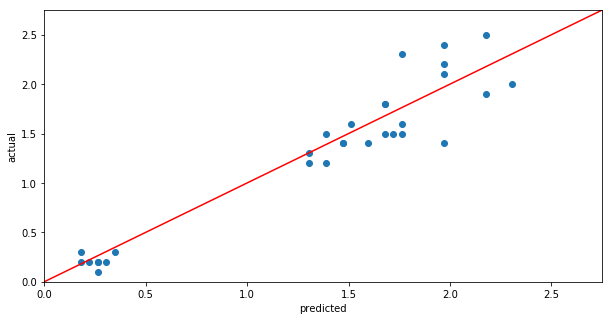

In [18]:
X = [d[0] for d in predictions_with_actual]
Y = [d[1] for d in predictions_with_actual]

max_value = max(X + Y) * 1.1

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.xlabel('predicted')
plt.ylabel('actual')

plt.xlim(0, max_value)
plt.ylim(0, max_value)

plt.scatter(X, Y)
plt.plot([0, max_value], [0, max_value], color='red')
plt.show()

In the above graph, we would have preferred to have had all the data land on the line, that would suggest
that we had correctly predicted all values.  

#### Measuring Correctness

We now have some data and some predicted results, what we want to do is to determine how correct the model
that we trained is.  

There are a few types of correctness that we can use, $r^2$, RMSE, MAE, etc. 

##### R2 ($r^2$)

The first method that we will look at is the $r^2$ method.  This is called the `coefficient of determination`. 
as the name implies this is the $r$ value squared.  We calculated the $r$ value above, so lets use it on the
predictions vs actuals. 

In [19]:
r = r_score(predictions_with_actual)
r ** 2

0.9082211838083142

So looking at our $r^2$ there are a few things that we want to make sure we understand before we assume that
because we have a `0.9` we are in a good place.  

R-squared will always increase as you add more inputs (related or not) to the model, especially if you have 
more inputs then datapoints.   This leads to a situation where we could be optimizing for a high $r^2$
which would likely lead to an overfit model.  

As a Data Scientist stated - "$r^2$ is typically used to measure the fit on the data that was used in the regression, aka the training data" 

##### MAE, MSE and RMSE

The three mean error checks are:

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error

The algorithm for **MSE** is pretty straight forward. ($\hat{y}$ is the predicted value, $y$ is the actual)
$$ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

For the **RMSE** just take the square root of the MSE results
$$ \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

Finally we have **MAE** which is similar to MSE
$$ \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i| $$

Lets code these up and compare the results. 

In [20]:
def mean_operation(prediction_actuals, operation=abs, root=False):
    n = len(prediction_actuals)
    errors = [operation(y-yh) for yh, y in prediction_actuals]
    result = sum(errors) / n
    return result if not root else math.sqrt(result)

mae = mean_operation(predictions_with_actual)
mse = mean_operation(predictions_with_actual, operation=lambda x: x ** 2)
rmse = mean_operation(predictions_with_actual, operation=lambda x: x ** 2, root=True)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 0.17696023593299154
MSE: 0.05085602082239144
RMSE: 0.22551279525204648


## TODO: Analysis and comparision of correctness results. 

### Fit and Coefficient of Determination

With the only dependent variable, the only sum of squres is due to error.  Therefore it is also the total and MAXIMUM sum of squares for the data under analysis.  

SSE = 120
SST = 120
SSE = SST

Once we have the regression line in place we would idealy want the error or sum of squares to be reduced significantly.  The difference between SST and SSE is the SSR due to regression that we have done...  

In essence with the regression model we always want to decrease the overall SSE. The SSR is going to be the amount of error that was reduced because of our regression model.  

SST = SSR + SSE

If SSR is large, it uses up more of the SST and therefore SSE is smaller relative to SST.  The **coefficient of determination** quantifies this ratio as a percentage.  

$$r^2 = \frac{SSR}{SST}$$

This can conclude what percent of the total sum of squares can be explained by the regression equation.  The remainder is error.  A higher $r^2$ means the model is a **good fit**

$$SSE = \sum{(y_i - \hat{y}_i)^2} $$

$$SST = \sum{(y_i - \bar{y})^2} $$

$$SSR = \sum{(\hat{y}_i - \bar{y})^2} $$

## TODO Look up ANOVA and relationship to Linear Regression

### References

* [Dummies, how to calculate a correlation](http://www.dummies.com/education/math/statistics/how-to-calculate-a-correlation/) 
* [Regression Analysis, how do I interpret r2 and access the goodness of a fit](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)
* [Wikipedia - Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) 
* [Assessing the Fit of Regression Model](https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/)  
